# FiveThirtyEight: Film Ratings, 2015

<br></br>
<i>FiveThirtyEight is a website that uses aggregated data to report on a wide range of topics, including pop culture, economics, politics, and sports. It was founded in 2008, became a licensed feature under the New York Times online in 2010, and acquired by ESPN in 2013. It is currently owned by ABC News.</i>

## Dataset

FiveThirtyEight investigated and [posted its findings](https://fivethirtyeight.com/features/fandango-movies-ratings/) regarding potential bias in film ratings. The study included 147 films from 2015, which has at least 30 Fandango consumer reviews, and substantive user and critic reviews from Rotten Tomatoes, Metacritic, and IMDb. The study showed Fandango usually rounded up the average rating to the next 0.5 value (half star), instead of displaying the raw rating.

The original dataset came from FiveThirtyEight's Github repo. For the data visualization exercises below, the dataset would be streamlined to include only average scores from users (removing aggregated critics' scores), since not all aggregators have scores from critics. The table below shows sample of the user score data:

In [1]:
import pandas as pd

reviews = pd.read_csv('datasets/fandango_scores.csv')
user_columns = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
user_reviews = reviews[user_columns]
user_reviews.set_index('FILM').head(10).T\
            .style.set_properties(**{'width':'10em', 'text-align':'right'})\
            .set_table_styles([dict(selector="th", props=[('text-align', 'right')])])

FILM,Avengers: Age of Ultron (2015),Cinderella (2015),Ant-Man (2015),Do You Believe? (2015),Hot Tub Time Machine 2 (2015),The Water Diviner (2015),Irrational Man (2015),Top Five (2014),Shaun the Sheep Movie (2015),Love & Mercy (2015)
RT_user_norm,4.3,4,4.5,4.2,1.4,3.1,2.65,3.2,4.1,4.35
Metacritic_user_nom,3.55,3.75,4.05,2.35,1.7,3.4,3.8,3.4,4.4,4.25
IMDB_norm,3.9,3.55,3.9,2.7,2.55,3.6,3.45,3.25,3.7,3.9
Fandango_Ratingvalue,4.5,4.5,4.5,4.5,3,4,3.5,3.5,4,4
Fandango_Stars,5,5,5,5,3.5,4.5,4,4,4.5,4.5


Here are the definitions:

| Column              | Definition          |
|:--------------------|:--------------------|
| RT_user_norm        | average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale |
| Metacritic_user_nom | average user rating from Metacritic, normalized to a 1 to 5 point scale |
| IMDB_norm           | average user rating from IMDB, normalized to a 1 to 5 point scale |
| Fandango_Ratingvalue| average user rating from Fandango, normalized to a 1 to 5 point scale |
| Fandango_Stars      | the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale) |

## Exercises: Bar Graphs and Scatter Plots

The focus of these exercises is on basic data visualization, specifically creating bar graphs and scatter plots using `matplotlib.pyplot`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# creating column labels for better readability
user_labels = ['FILM', 'Rotten Tomatoes', 'Metacritic', 'IMDB', 'Fandango Ratingvalue', 'Fandango Stars']

### Bar Graphs

Here is a sample horizontal bar graph that illustrates the significant differences across user ratings for **Avengers: Age of Ultron (2015)**, with the biggest disparity between Metacritic users and the Fandango website rating.

In [3]:
user_reviews.iloc[0].values[1:]

array([4.3, 3.55, 3.9, 4.5, 5.0], dtype=object)

In [4]:
def sample_barh(i):
    title = user_reviews.iloc[i].values[0]
    bar_widths = user_reviews.iloc[i].values[1:]
    bar_positions = np.arange(5) + 0.75

    fig, ax = plt.subplots(figsize=(15,4))
    ax.barh(bar_positions, bar_widths, 0.6)
    ax.set_yticklabels(labels=user_labels)
    ax.set_xlabel('Average Rating'.upper(), fontsize=13, labelpad=10)
    ax.set_ylabel('Rating Source'.upper(), fontsize=13, labelpad=10)
    plt.title('Average User Rating For {0}'.format(title).upper(), fontsize=14, pad=20)            
    plt.show()

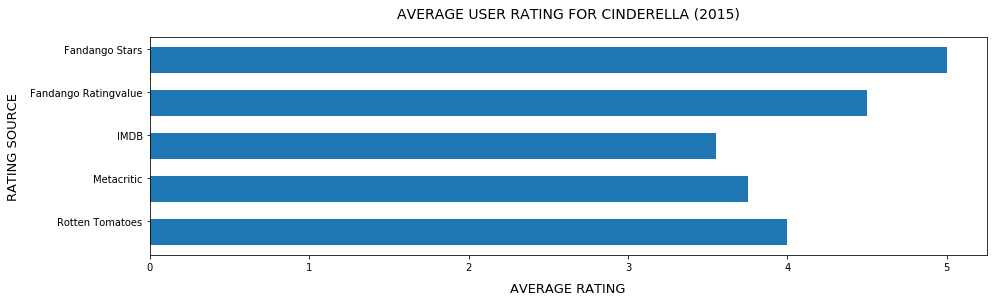

In [5]:
sample_barh(1)

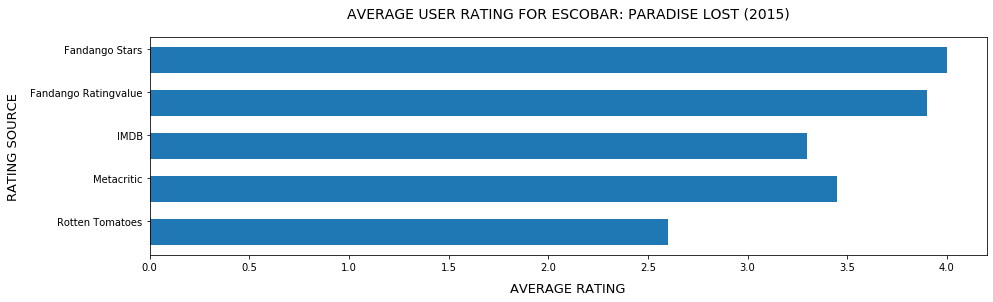

In [6]:
sample_barh(110)

### Scatter Plots

In [7]:
# column markers - Fandango and Rotten Tomatoes
f,r = user_columns[4], user_columns[1]

# column names 
fl,rl = user_labels[4].split()[0], user_labels[1]

# font sizes and padding
h1 = 14
h2 = 13
lp = 10

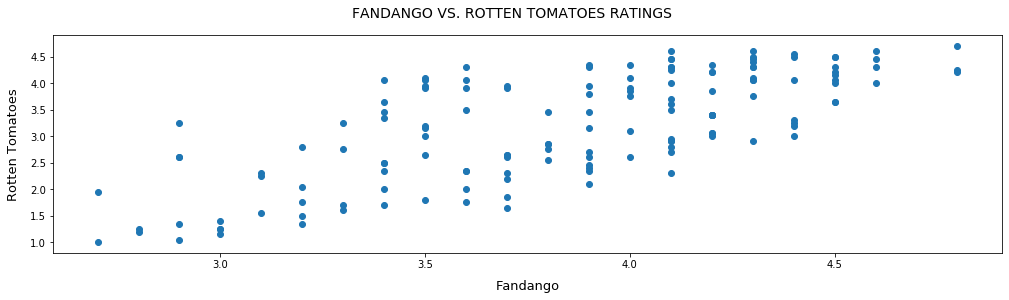

In [8]:
fig, ax = plt.subplots(figsize=(17,4))
fig.suptitle('{} vs. {} Ratings'.format(fl,rl).upper(), fontsize=h1)

ax.scatter(reviews[f], reviews[r])
plt.xlabel(fl, fontsize=h2, labelpad=lp)
plt.ylabel(rl, fontsize=h2, labelpad=lp)
plt.show()

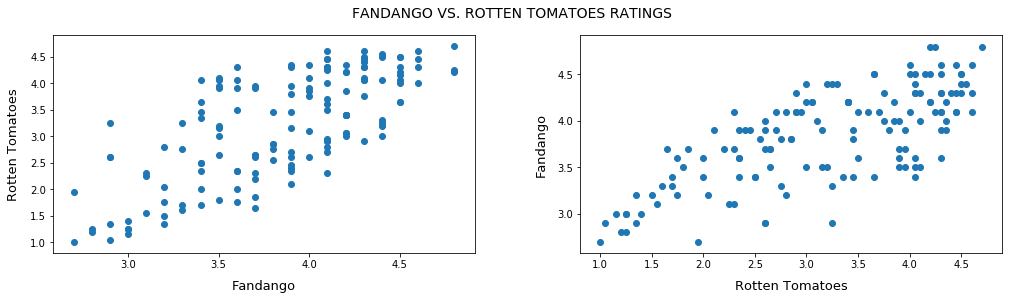

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,4))
fig.suptitle('{} vs. {} Ratings'.format(fl,rl).upper(), fontsize=h1)

ax1.scatter(reviews[f], reviews[r])
ax1.set_xlabel(fl, fontsize=h2, labelpad=lp)
ax1.set_ylabel(rl, fontsize=h2, labelpad=lp)

ax2.scatter(reviews[r], reviews[f])
ax2.set_xlabel(rl, fontsize=h2, labelpad=lp)
ax2.set_ylabel(fl, fontsize=h2, labelpad=lp)

plt.subplots_adjust(wspace=0.25)
plt.show()

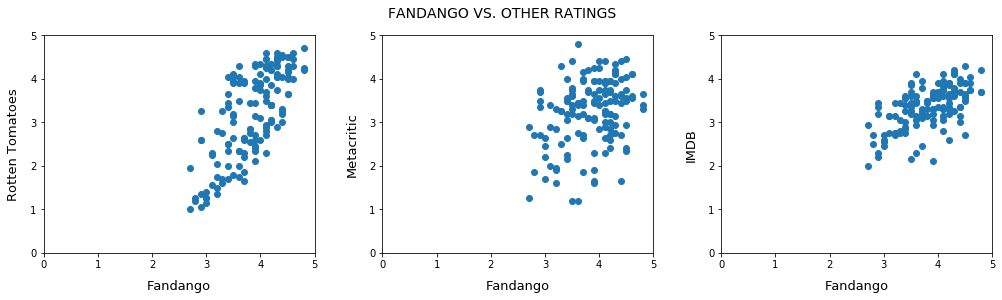

In [10]:
fig = plt.figure(figsize=(17,4))
fig.suptitle('{} vs. Other Ratings'.format(fl).upper(), fontsize=h1)
    
for i in range(3):
    z = i + 1
    fig.add_subplot(1,3,z)
    plt.scatter(reviews[f], reviews[user_columns[1:4][i]])
    plt.xlim(0,5)
    plt.ylim(0,5)
    plt.xlabel(fl, fontsize=h2, labelpad=lp)
    plt.ylabel(user_labels[1:4][i], fontsize=h2, labelpad=lp)

plt.subplots_adjust(wspace=0.25)
plt.show()

## Conclusion

The scatter plots show that user ratings from IMDB and Fandango are the most similar, while Metacritic and Rotten Tomatoes ratings have positive but weak correlations with Fandango user ratings. Fandago and Metacritic seems to be least correlated. 

It is also noticeable that the range of values become smaller as we move through the figure from left to right: ratings from Metacritic and Rotten Tomatoes range from 1 to 5, while those from IMDB range approximately from 2 to 4.5 (or half the span of the first two). Fandango ratings range approximately from 2.5 to 5, which has the same span as IMDB's, but less critical.

## Appendix: Further Investigation

To maximize the dataset, I created a separate notebook that looked for patterns where there's the most discrepancy between Fandango and the most critical / lowest aggregate score. I then used opening week sales to see if my suspicion that everything is motivated by opening week sales.